In [5]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns                 
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import plotly.express as px
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [58]:
#logs Dataset, Unstructured Data
logs_df = pd.read_csv('tokenized_access_logs.csv')

In [59]:
logs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469977 entries, 0 to 469976
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Product     469977 non-null  object
 1   Category    469977 non-null  object
 2   Date        469977 non-null  object
 3   Month       469977 non-null  object
 4   Hour        469977 non-null  int64 
 5   Department  469977 non-null  object
 6   ip          469977 non-null  object
 7   url         469977 non-null  object
dtypes: int64(1), object(7)
memory usage: 28.7+ MB


In [60]:
logs_df.head()

,Product,Category,Date,Month,Hour,Department,ip,url
0,adidas Brazuca 2017 Official Match Ball,baseball & softball,9/1/2017 6:00,Sep,6,fitness,37.97.182.65,/department/fitness/category/baseball%20&%20so...
1,The North Face Women's Recon Backpack,hunting & shooting,9/1/2017 6:00,Sep,6,fan shop,206.56.112.1,/department/fan%20shop/category/hunting%20&%20...
2,adidas Kids' RG III Mid Football Cleat,featured shops,9/1/2017 6:00,Sep,6,apparel,215.143.180.0,/department/apparel/category/featured%20shops/...
3,Under Armour Men's Compression EV SL Slide,electronics,9/1/2017 6:00,Sep,6,footwear,206.56.112.1,/department/footwear/category/electronics/prod...
4,Pelican Sunstream 100 Kayak,water sports,9/1/2017 6:01,Sep,6,fan shop,136.108.56.242,/department/fan%20shop/category/water%20sports...


In [12]:
# I have imported 2 datasets for supply chain analysis.
import pandas as pd

# Read the main dataset
df = pd.read_csv('DataCoSupplyChainDataset.csv',encoding='ISO-8859-1')

# Read the description dataset
description_df = pd.read_csv('DescriptionDataCoSupplyChain.csv')


In [13]:
# Step 1: Data Exploration
# Display the first few rows of each DataFrame
print("First few rows of df:")
print(df.head())
print("\nFirst few rows of description_df:")
print(description_df.head())


First few rows of df:
       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1     

In [14]:
# Display basic information about the datasets
print("\nInfo about df:")
print(df.info())
print("\nInfo about description_df:")
print(description_df.info())


Info about df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname

In [15]:
# Step 2: Data Cleaning
# Check for missing values
print("\nMissing values in df:")
print(df.isnull().sum())
print("\nMissing values in description_df:")
print(description_df.isnull().sum())



Missing values in df:
Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market           

In [16]:
df = df.drop(columns=['Product Description', 'Customer Email', 'Product Image', 'Customer Password'])

df['Customer Lname'] = df['Customer Lname'].fillna('Unknown')
df['Customer Zipcode'] = df['Customer Zipcode'].fillna('Unknown')

df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'], errors='coerce')

df['Year'] = df['order date (DateOrders)'].dt.year
df['Month'] = df['order date (DateOrders)'].dt.month
df['YearMonth'] = df['order date (DateOrders)'].dt.strftime('%Y-%m')

In [17]:
 # Save the cleaned df to csv, this dataset is cleaned and merged both of the dataset into one for ease of use and efficiency.
df.to_csv('DataCo_cleaned.csv', index = False)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 52 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id                    180519 non-null  int64         
 8   Category Name                  180519 non-null  object        
 9   Customer City                  180519 non-null  object        
 10  Customer Country               180519 non-null  object        
 11  

In [18]:
#Numerical Features Analysis
#Unique Values - Customers, Orders, Products
unique_count_customer = df['Customer Id'].nunique(dropna=False)
print(f'There are {unique_count_customer} unique customers.')

unique_count_orderid = df['Order Id'].nunique(dropna=False)
print(f'There are {unique_count_orderid} unique orders.')


unique_count_pid = df['Product Card Id'].nunique(dropna=False)
print(f'There are {unique_count_pid} unique products.')

There are 20652 unique customers.
There are 65752 unique orders.
There are 118 unique products.


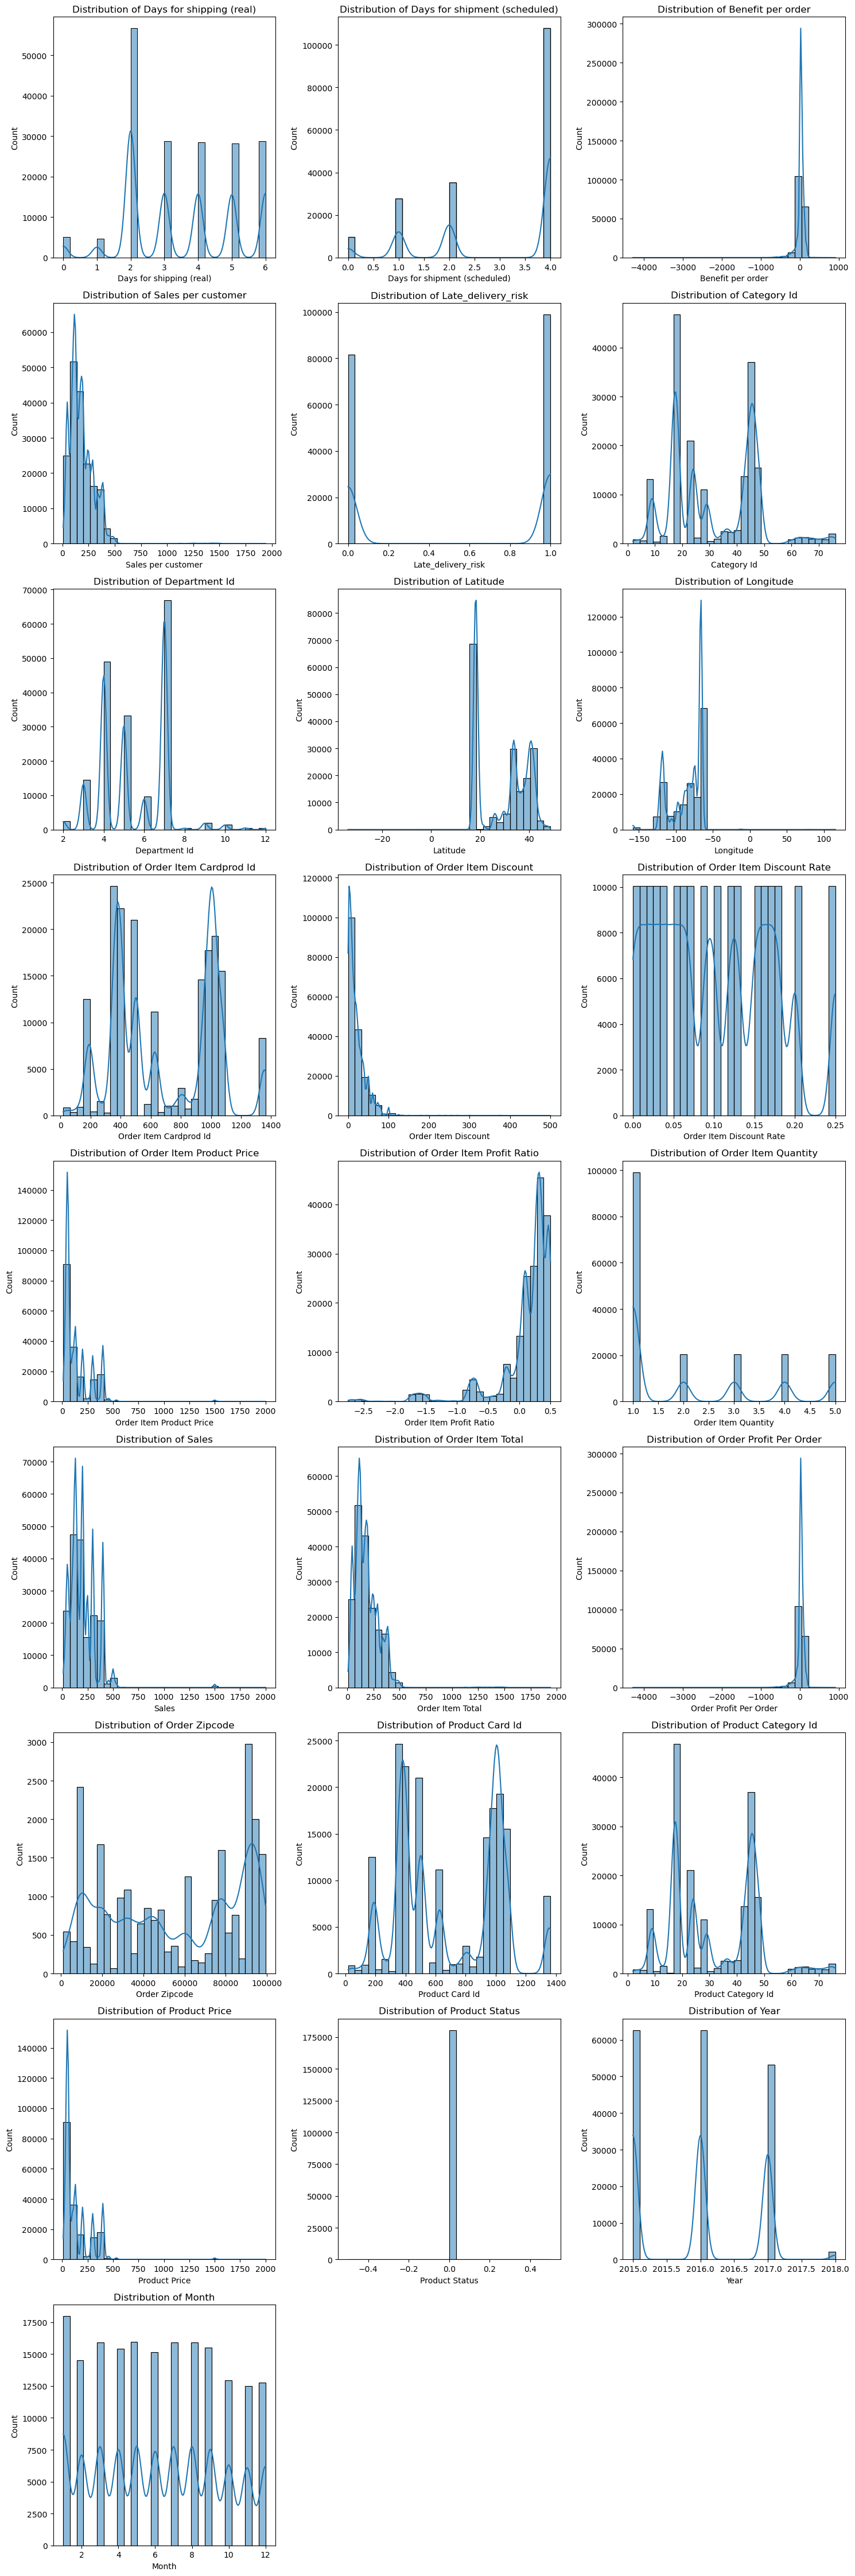

In [21]:
#Exploratory Data Analysis
#Numerical Value Distributions
numerical_data = df.select_dtypes(include=[np.number]).drop(columns=['Order Id', 'Order Customer Id',
                                                                    'Customer Id', 'Order Item Id'])

num_cols = numerical_data.shape[1]
n_rows = (num_cols // 3) + (num_cols % 3 > 0)

plt.figure(figsize=(15, 5 * n_rows))
for idx, col in enumerate(numerical_data.columns):
    plt.subplot(n_rows, 3, idx + 1)
    sns.histplot(numerical_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()
# This part is one of the  exploratory data analysis (EDA) on numerical columns of the DataFrame.
# It selects only numerical columns from the DataFrame using the select_dtypes method, excluding
#specific columns such as Order Id, Order Customer Id, Customer Id, and Order Item Id, which are likely identifiers and not suitable for distribution analysis.

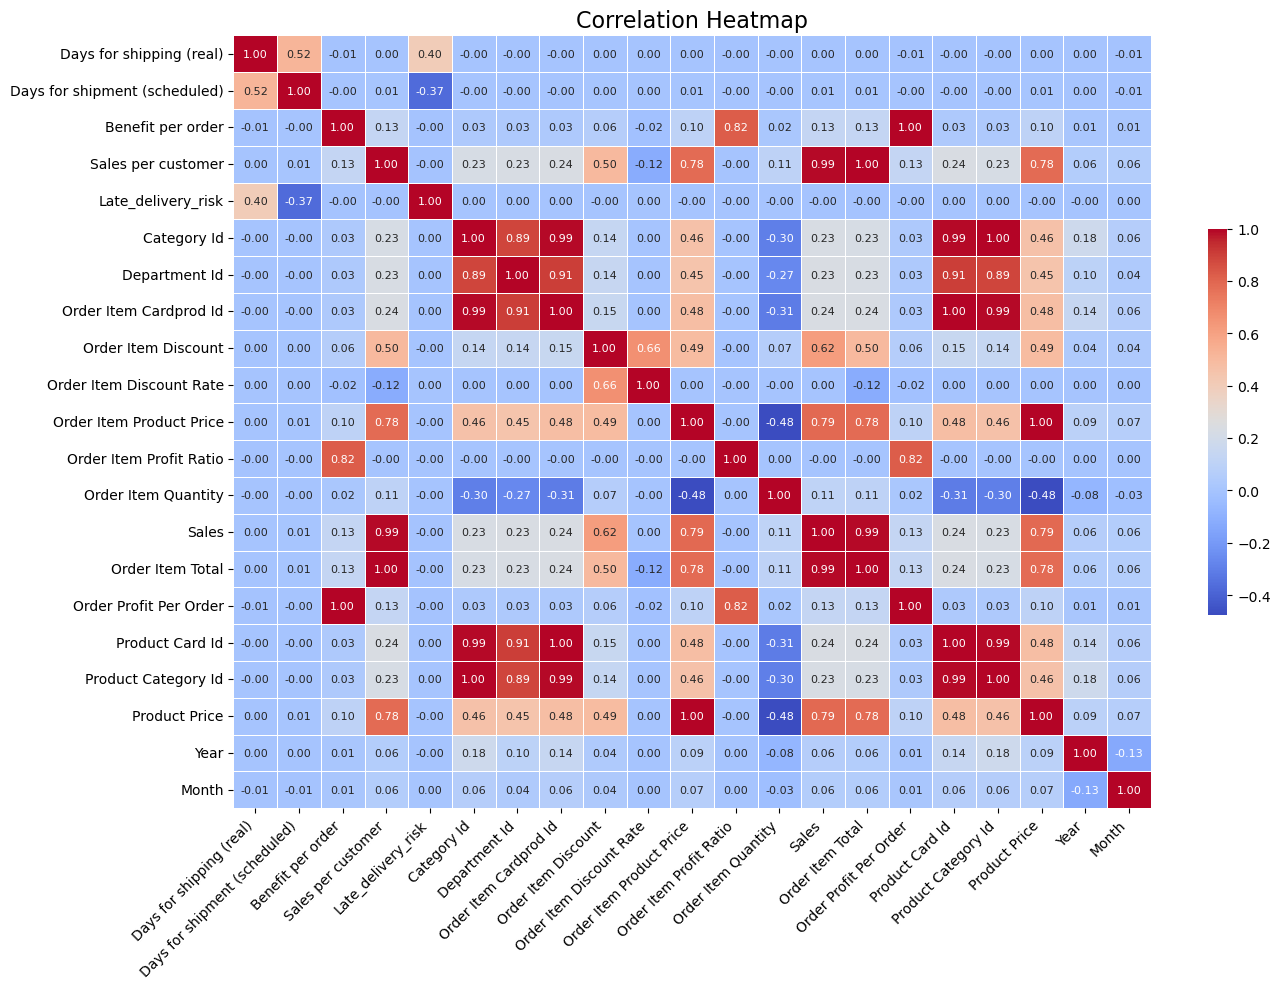

In [22]:
#Correlation Analysis
correlation_matrix = numerical_data.drop(columns=['Order Zipcode', 'Latitude', 'Longitude', 'Product Status']).corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            annot_kws={"size": 8}, 
            linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap', size=16)
plt.xticks(rotation=45, ha="right")  
plt.yticks(rotation=0)
plt.tight_layout()

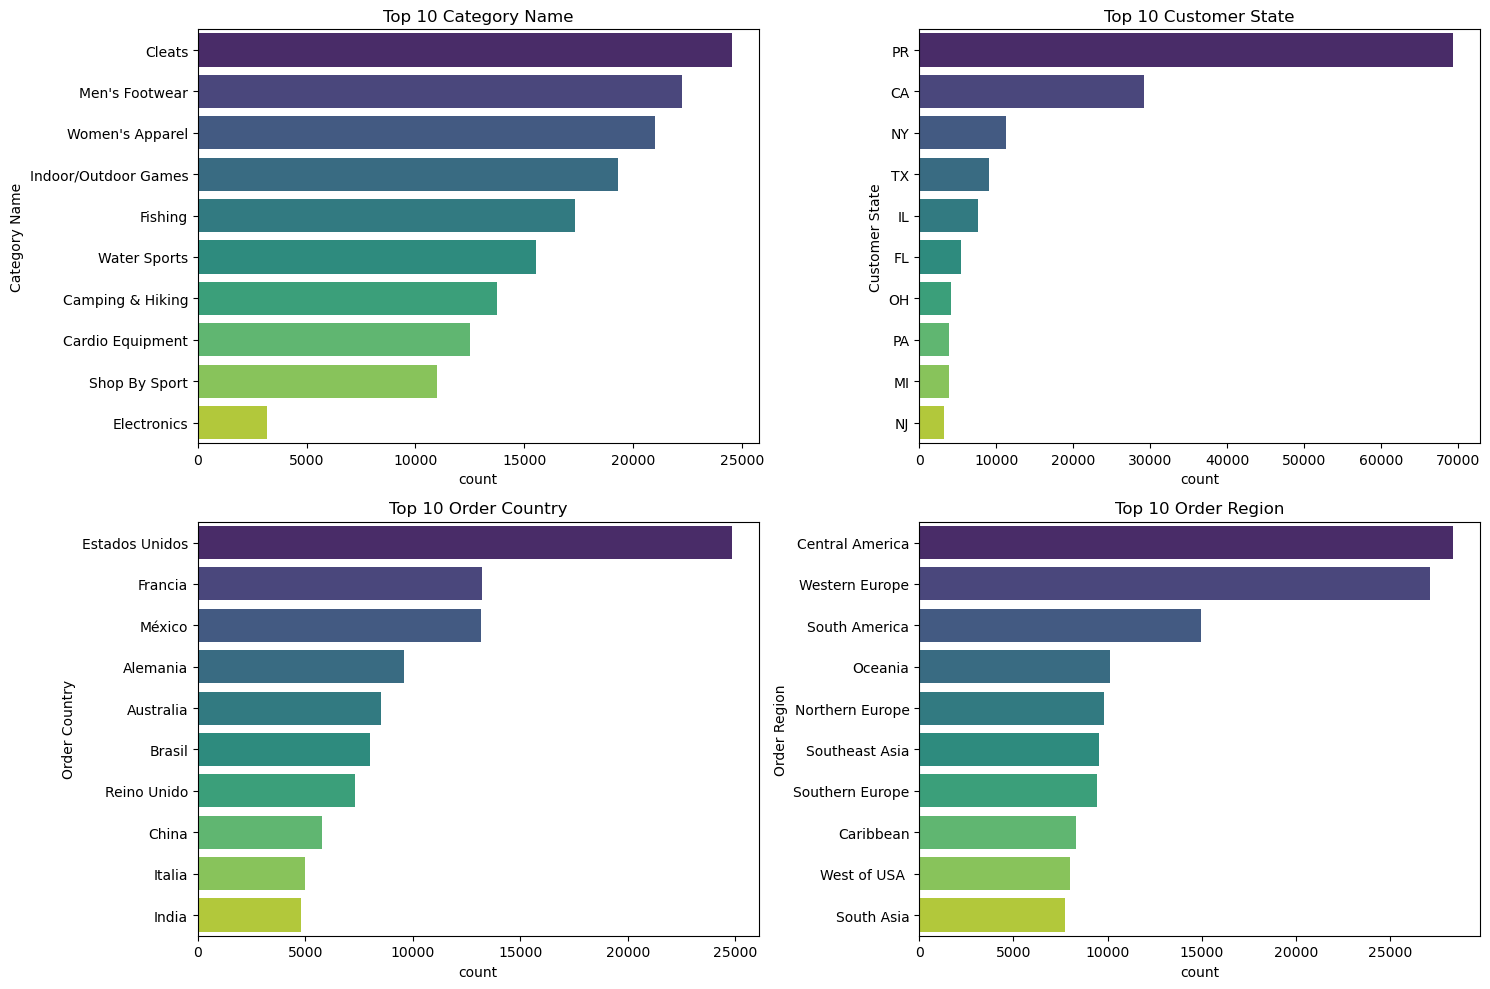

In [23]:
# Select the categorical columns that have more than 10 distinct values
categorical_data = df[['Category Name', 'Customer State', 'Order Country', 'Order Region']]

num_cols = categorical_data.shape[1]
n_rows = (num_cols // 2) + (num_cols % 2 > 0)

plt.figure(figsize=(15, 5 * n_rows))
for idx, col in enumerate(categorical_data.columns):
    plt.subplot(n_rows, 2, idx + 1)
    category_counts = categorical_data[col].value_counts().head(10)
    sns.barplot(x=category_counts, y=category_counts.index, palette="viridis")
    plt.title(f'Top 10 {col}')
    plt.tight_layout()

plt.show()

In [25]:
#Sales Trend Analysis
#Monthly Sales,Orders Trend
months_in_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
df['MonthName'] = df['order date (DateOrders)'].dt.month_name()
df['MonthName'] = pd.Categorical(df['MonthName'], categories=months_in_order, ordered=True)

#Monthly sales are calculated by grouping the DataFrame by 'MonthName' and calculating the mean of 'Sales per customer'.
monthly_sales = df.groupby('MonthName')['Sales per customer'].mean()

#Monthly order count is calculated by grouping the DataFrame by 'MonthName' and counting the unique values of 'Order Id'.
monthly_order_count = df.groupby('MonthName')['Order Id'].nunique()

 
# This represents the number of orders placed in each month.

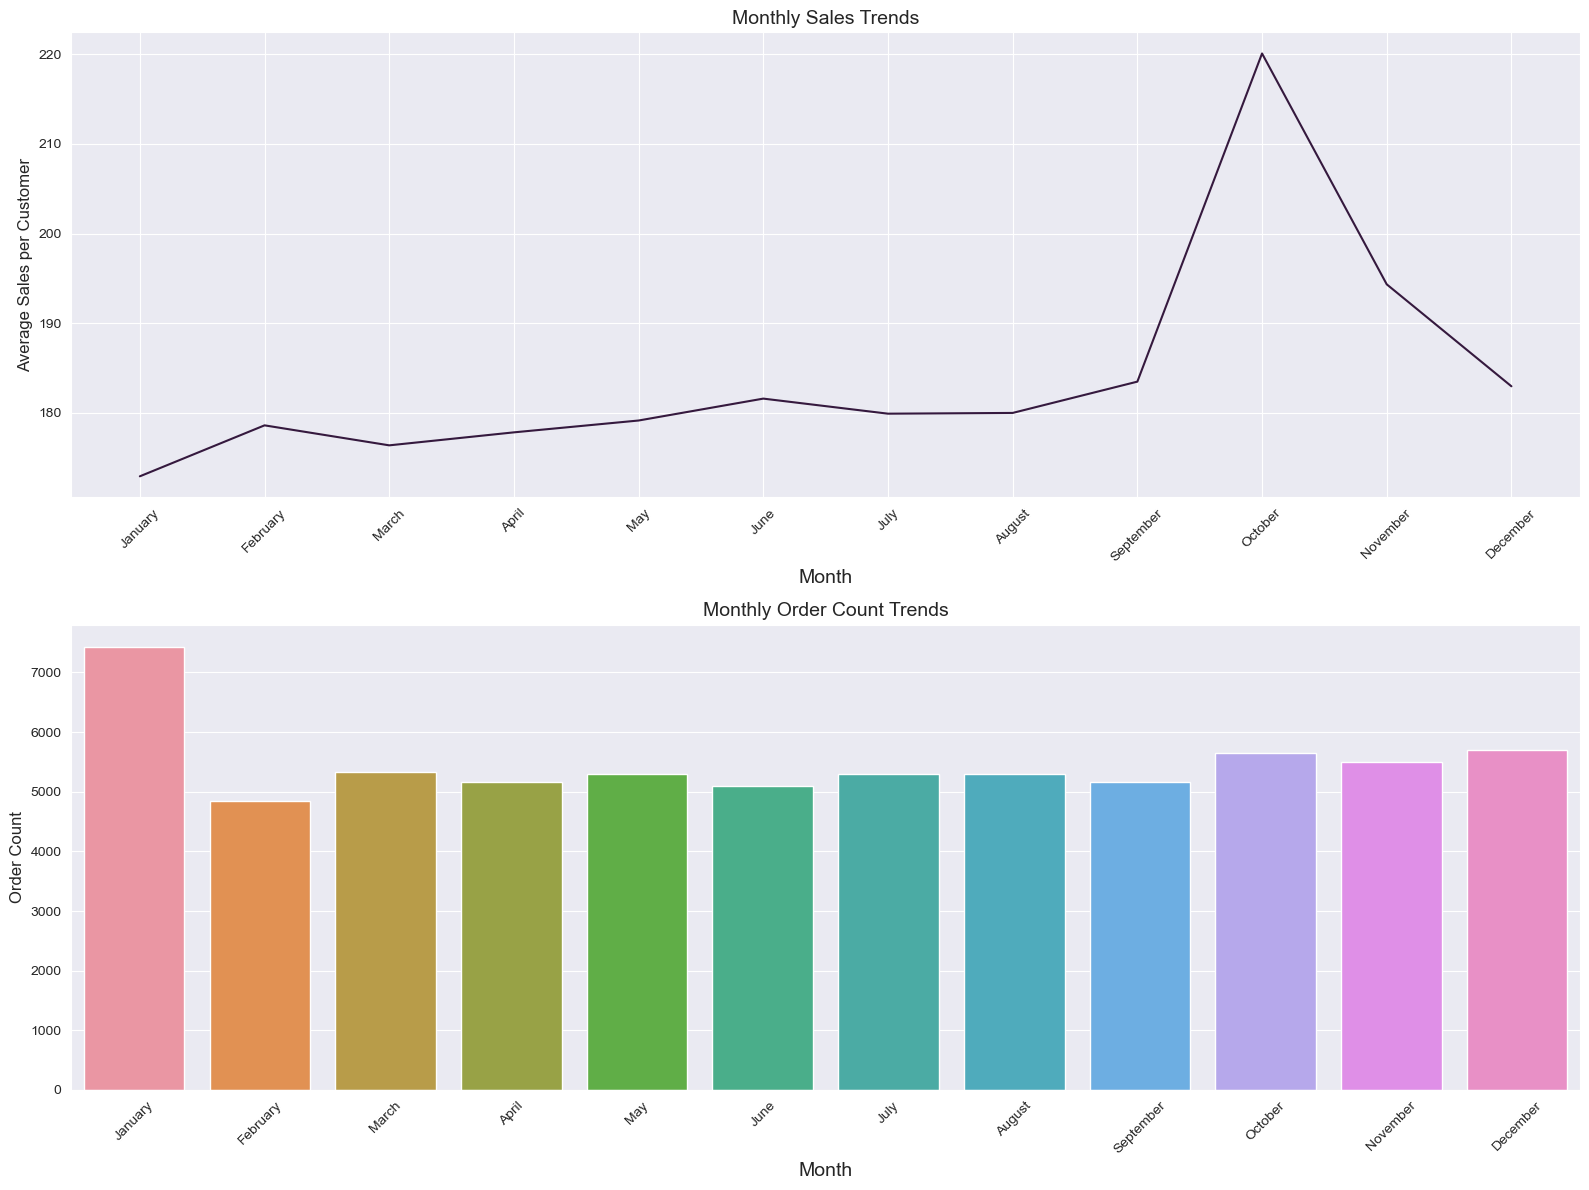

In [42]:
sns.set_palette("rocket") 
sns.set_style("darkgrid")
fig, axs = plt.subplots(2, 1, figsize=(16, 12))

# Monthly sales trends
sns.lineplot(data=monthly_sales, ax=axs[0])
axs[0].set_title('Monthly Sales Trends', fontsize=14)
axs[0].set_xlabel('Month', fontsize=14)
axs[0].set_ylabel('Average Sales per Customer', fontsize=12)
axs[0].set_xticklabels(months_in_order, rotation=45)

# Monthly order count trends
sns.barplot(x=monthly_order_count.index, y=monthly_order_count.values, ax=axs[1])
axs[1].set_title('Monthly Order Count Trends', fontsize=14)
axs[1].set_xlabel('Month', fontsize=14)
axs[1].set_ylabel('Order Count', fontsize=12)
axs[1].set_xticklabels(months_in_order, rotation=45)

plt.tight_layout()
plt.show()

In [43]:
#Yearly Sales,Orders Trend
yearly_sales = df.groupby('Year')['Sales per customer'].mean()
yearly_order_count = df.groupby('Year')['Order Id'].nunique()

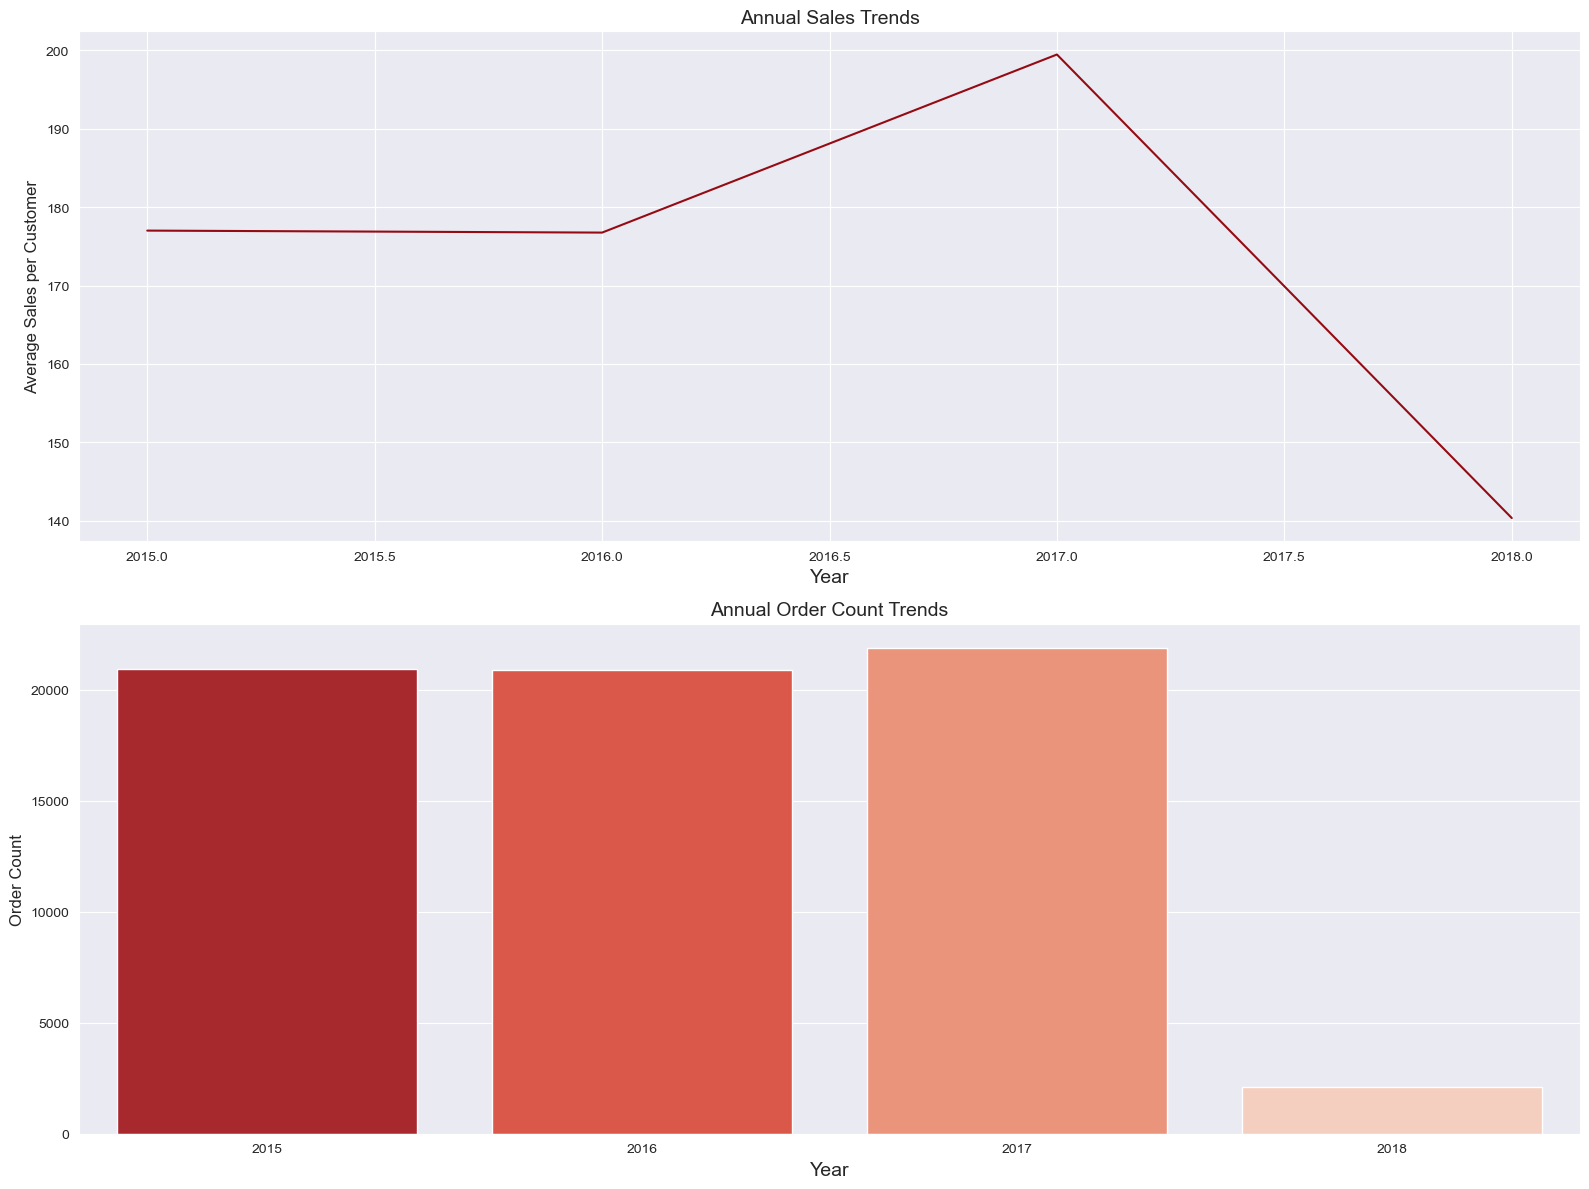

In [52]:
sns.set_palette(sns.color_palette("Reds_r", n_colors=10))  # Using 10 shades of red
sns.set_style("darkgrid")

fig, axs = plt.subplots(2, 1, figsize=(16, 12))

# Annual sales trends
sns.lineplot(data=yearly_sales, ax=axs[0])
axs[0].set_title('Annual Sales Trends', fontsize=14)
axs[0].set_xlabel('Year', fontsize=14)
axs[0].set_ylabel('Average Sales per Customer', fontsize=12)

# Annual order count trends
sns.barplot(x=yearly_order_count.index, y=yearly_order_count.values, ax=axs[1], palette="Reds_r")
axs[1].set_title('Annual Order Count Trends', fontsize=14)
axs[1].set_xlabel('Year', fontsize=14)
axs[1].set_ylabel('Order Count', fontsize=12)

plt.tight_layout()
plt.show()


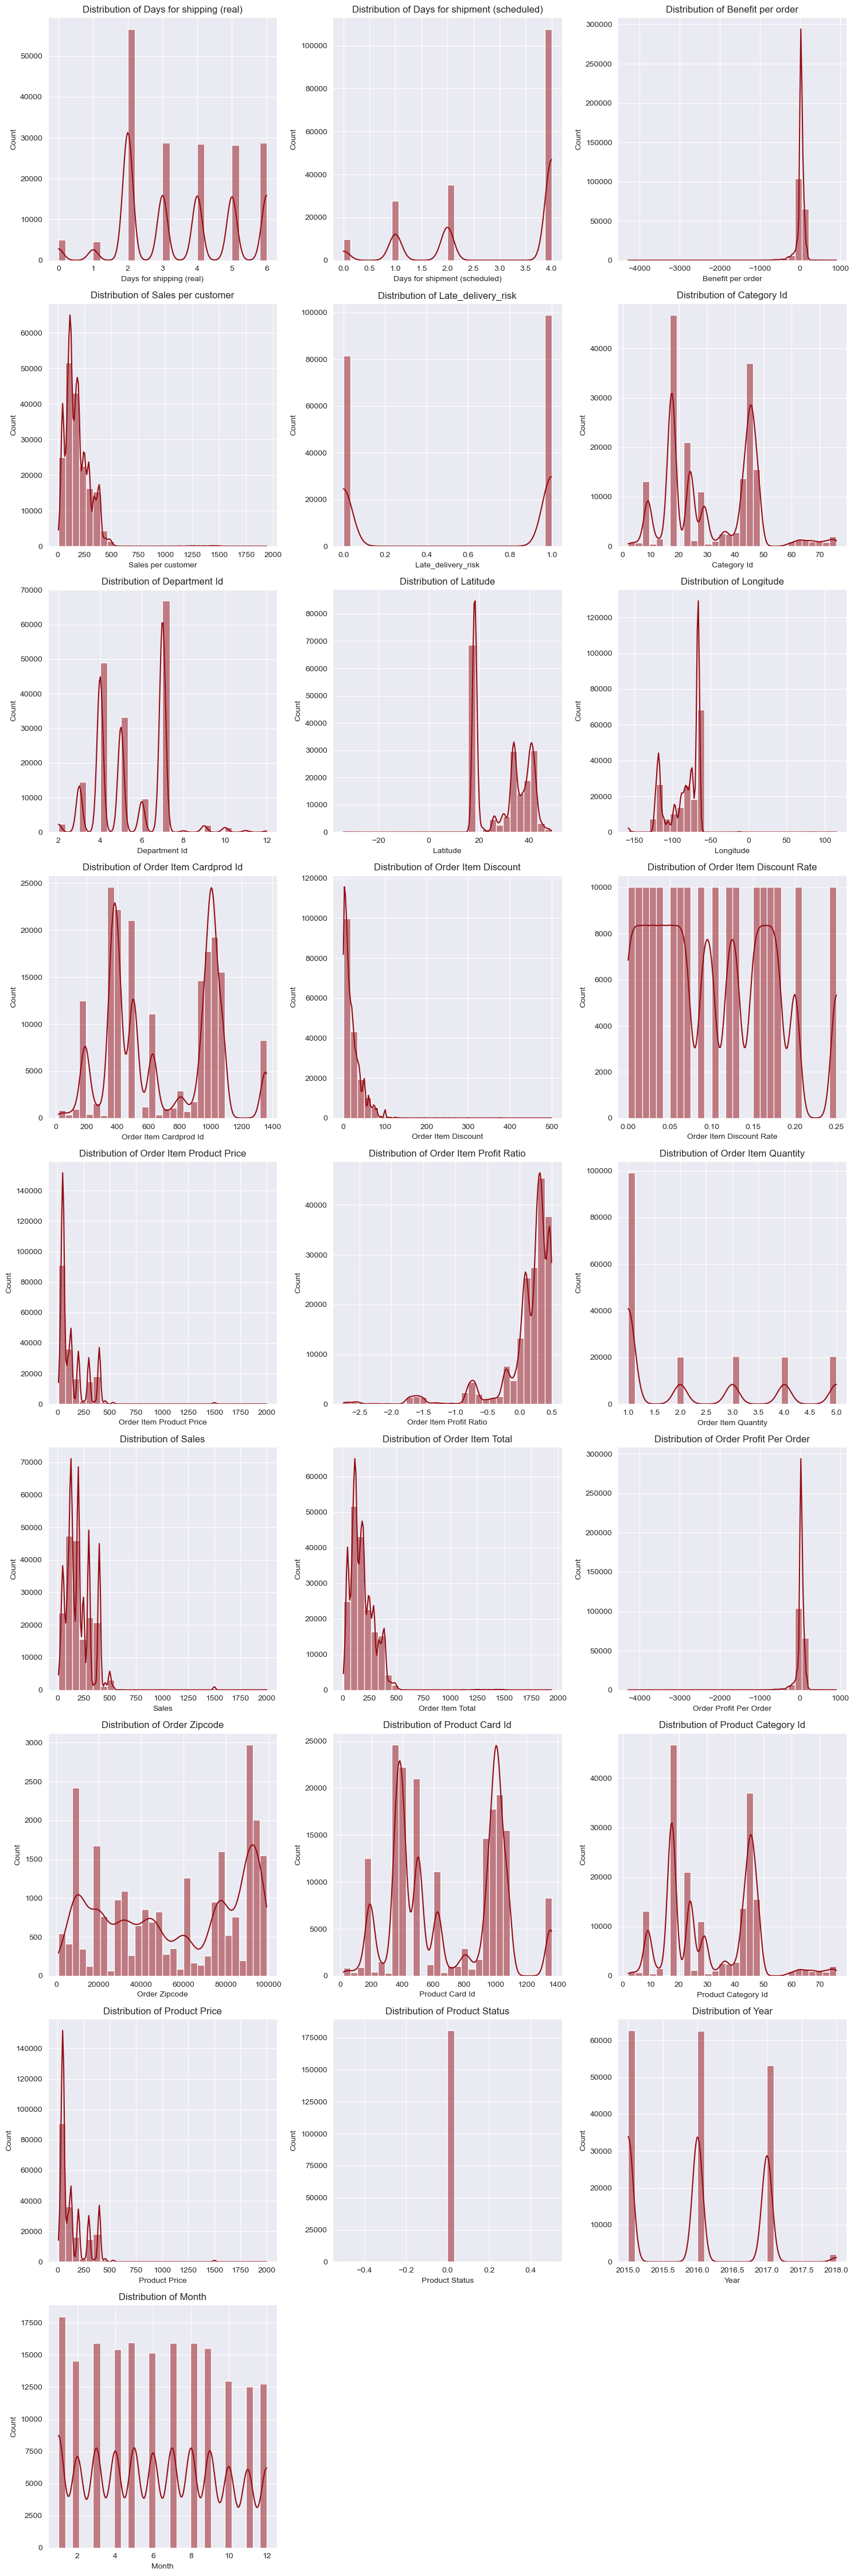

In [55]:
#I did EDA on the logs file and the merged file, these 2 datasets.
# Creating summaries in new files of each and every EDA done in the form of an image

# Calculate the number of rows and columns
num_cols = numerical_data.shape[1]
n_rows = num_cols // 3 + (num_cols % 3 > 0)
n_cols = min(num_cols, 3)

plt.figure(figsize=(15, 5 * n_rows))
for idx, col in enumerate(numerical_data.columns):
    plt.subplot(n_rows, n_cols, idx + 1)
    sns.histplot(numerical_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

# Save the numerical value distributions plot
plt.figure(figsize=(15, 5 * n_rows))
for idx, col in enumerate(numerical_data.columns):
    plt.subplot(n_rows, 3, idx + 1)
    sns.histplot(numerical_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.savefig('numerical_value_distributions.png')
plt.close()

# Save the correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            annot_kws={"size": 8}, 
            linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap', size=16)
plt.xticks(rotation=45, ha="right")  
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.close()

# Save the top 10 categorical data bar plots
plt.figure(figsize=(15, 5 * n_rows))
for idx, col in enumerate(categorical_data.columns):
    plt.subplot(n_rows, 2, idx + 1)
    category_counts = categorical_data[col].value_counts().head(10)
    sns.barplot(x=category_counts, y=category_counts.index, palette="viridis")
    plt.title(f'Top 10 {col}')
    plt.tight_layout()
plt.savefig('top_10_categorical_data.png')
plt.close()

# Save the monthly sales and order count trend plots
sns.set_palette("rocket") 
sns.set_style("darkgrid")
fig, axs = plt.subplots(2, 1, figsize=(16, 12))
sns.lineplot(data=monthly_sales, ax=axs[0])
axs[0].set_title('Monthly Sales Trends', fontsize=14)
axs[0].set_xlabel('Month', fontsize=14)
axs[0].set_ylabel('Average Sales per Customer', fontsize=12)
axs[0].set_xticklabels(months_in_order, rotation=45)
sns.barplot(x=monthly_order_count.index, y=monthly_order_count.values, ax=axs[1])
axs[1].set_title('Monthly Order Count Trends', fontsize=14)
axs[1].set_xlabel('Month', fontsize=14)
axs[1].set_ylabel('Order Count', fontsize=12)
axs[1].set_xticklabels(months_in_order, rotation=45)
plt.tight_layout()
plt.savefig('monthly_sales_order_trends.png')
plt.close()

# Save the yearly sales and order count trend plots
sns.set_palette("Reds_r") 
sns.set_style("darkgrid")
fig, axs = plt.subplots(2, 1, figsize=(16, 12))
sns.lineplot(data=yearly_sales, ax=axs[0])
axs[0].set_title('Annual Sales Trends', fontsize=14)
axs[0].set_xlabel('Year', fontsize=14)
axs[0].set_ylabel('Average Sales per Customer', fontsize=12)
sns.barplot(x=yearly_order_count.index, y=yearly_order_count.values, ax=axs[1])
axs[1].set_title('Annual Order Count Trends', fontsize=14)
axs[1].set_xlabel('Year', fontsize=14)
axs[1].set_ylabel('Order Count', fontsize=12)
plt.tight_layout()
plt.savefig('annual_sales_order_trends.png')
plt.close()

#All of the EDAS are stored in a new file as asked, I have stored them as Images, I used online resources to learn how to do this.


In [56]:
# other ways of analysis:

#1.Predictive Modeling: Using historical data to forecast future outcomes.
#2.Customer Segmentation: Grouping customers based on shared characteristics.
#3.Time Series Analysis: Examining data collected over time to identify patterns.
#4.Text Mining: Extracting insights from unstructured text data.
#5.Network Analysis: Analyzing relationships between entities in a network.
#6.Geospatial Analysis: Using geographic data to derive insights.
#7.Customer Lifetime Value (CLV) Analysis: Estimating the value of customers over their lifetime.
#8.Market Basket Analysis: Identifying associations between products in transactions.
#9.Supply Chain Optimization: Improving efficiency in supply chain operations.
#10.Sentiment Analysis: Assessing attitudes and opinions from text data.

#this can be connected to a database and then to Power BI or any other tool to create more interactive dashboards, 
#this can be said as the the whole ETL process and data analyst part.

#could you please tell me more feedback on how to improve it..!